In [1]:
# Importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading data
data = load_dataset("lukebarousse/data_jobs")
df = data['train'].to_pandas()

# Cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x)if pd.notna(x) else x)

c:\Users\Namitha john\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


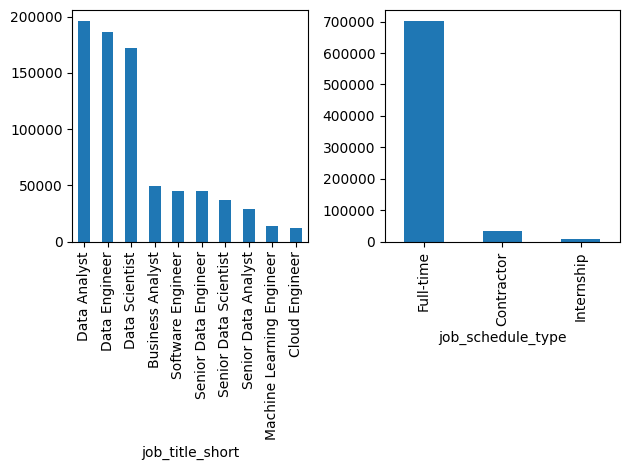

In [11]:
fig,ax = plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind = 'bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind = 'bar', ax=ax[1])
fig.tight_layout()

In [12]:
df_exploded = df.explode('job_skills')
skills_count = df_exploded.groupby(["job_title_short","job_skills"]).size()
df_skills_count = skills_count.reset_index(name = 'skill_count')
df_skills_count = df_skills_count.sort_values(by = 'skill_count', ascending = False)

In [13]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']


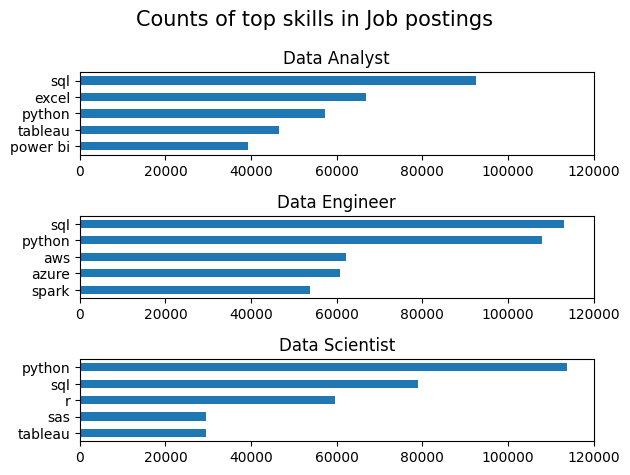

In [24]:
fig, ax = plt.subplots(3,1)

for i,job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind = 'barh', x = 'job_skills', y='skill_count', ax=ax[i], title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,120000)
    ax[i].legend().set_visible(False)
    
    fig.suptitle('Counts of top skills in Job postings', fontsize = 15)
    fig.tight_layout()

